<a href="https://colab.research.google.com/github/pedr19faria/Pred-Prey/blob/main/Predator_Prey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import scipy.integrate as si

### **Predator-Prey Models**
The Predator-Prey Model is a 2-species system in which a interaction between them occurs and that interaction can be described by the oscillations of their populations. In other words, when one of the growth rates increases the other decreases. One of the main models of the Predator-Prey interaction is The *Lotka-Volterra Systems*. These equations were developed by Alfred J. Lotka (1880 - 1949), an american biophysicist that went on to become one of the founders of theoretical population ecology, and Vito Volterra (1860 - 1940) a very important italian mathematician. One of the main articles where Lotka developed his ideias about this periodic phenomena is *"Analytical Note on Certain Rhythmic Relations in Organic Systems"* published in 1920 and he further developed his ideias on the book *"Elements of Mathematical Biology"* that was first published in 1925. Whereas Volterra published in 1926 a seminal paper of his on the this topic in *"Fluctuations in the Abundance of a Species considered Mathematically"* in the journal *Nature*, where he also explores the periodic behaviour of two species interactions, after being motivated to study this topic because of Umberto D’Ancona, who studied the oscillations of fish in the Andriatic Sea. Because of their contribution the equations that describe the interaction between predator and prey, like the ones shown below, are also called Lotka-Volterra Equations.
\
***N(t)*** : Prey Population \
***P(t)*** : Predator population \
*a, b, c* and *d* are all positive constants. \
$ \begin{cases}\dfrac{dN}{dt} = N(a - bP) & (1) \\ \dfrac{dP}{dt} = P(cN - d) & (2)\end{cases}$ \
 There are some important assumptions to be made:

1.  In the absence of predation the prey grows unboundedly ($Na$) in a malthusian way;

2.  The predation reduces the preys population proportionally to its sizes $(-bNP)$;

3.  With no prey the predadors die off $(-dP)$;

4.  The prey's contribution to the predators growth is in $+cPN$.

In [ ]:
### The following function receives the initial parameters and it's output
### is the prey's and predator's population
def answers(t,  a, b , c , d, N0, P0):
  u = np.zeros((2))
  u[0] = N0 # Prey
  u[1] = P0 # Predator

  def lotka_volterra(u,t, a, b , c , d):
      uprime = np.zeros((len(u)))

      uprime[0] = u[0]*(a - b*u[1])

      uprime[1] = u[1]*(c*u[0] - d)

      return uprime

  resultado = si.odeint(lotka_volterra, y0 =[N0, P0], t=t, args = (a,b,c,d)  ) # Scipys odeint solves systems of differential equations

  N = resultado.T[0]
  P = resultado.T[1]

  return N, P ### Predator, presa

Now let's see the results for different initial Parameters. First of changing the initial amount of Predators, P, and Preys, N.

In [ ]:
t = np.linspace(0.,50., 200)
# Parameters
a = 1.
b = 0.5
c = 0.25
d = 0.75
# The values for these constants have been taken out of the book:
# "Elementary Differential Equations and Boundary Value Problems" by W. E. Boyce and R. C. DiPrima
# Chapter 9.5

In [ ]:
### Same amount
n1 = 2.
p1 = 2.
### More prey
n2 = 4.
p2 = 2.
### More predators
n3 = 2.
p3 = 4.

In [ ]:
N1, P1 = answers(t,  a, b , c , d, n1, p1)
N2, P2 = answers(t,  a, b , c , d, n2, p2)
N3, P3 = answers(t,  a, b , c , d, n3, p3)

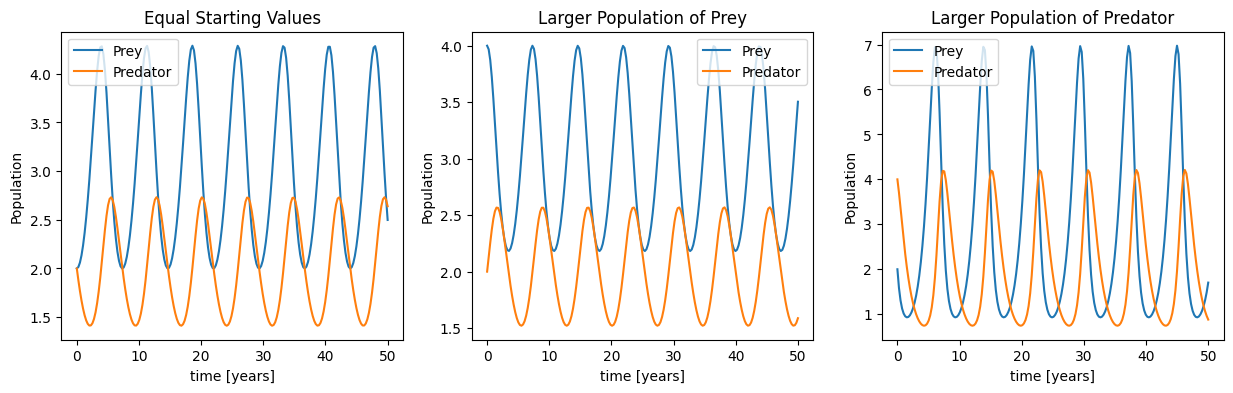

In [ ]:
fig, ax = plt.subplots(1,3,  figsize = (15,4))
ax[0].plot(t, N1, label = 'Prey')
ax[0].plot(t, P1, label = 'Predator')
ax[0].set_title('Equal Starting Values')
ax[0].set_xlabel('time [years]')
ax[0].set_ylabel('Population')

ax[1].plot(t, N2, label = 'Prey')
ax[1].plot(t, P2, label = 'Predator')
ax[1].set_title('Larger Population of Prey')
ax[1].set_xlabel('time [years]')
ax[1].set_ylabel('Population')

ax[2].plot(t, N3, label = 'Prey')
ax[2].plot(t, P3, label = 'Predator')
ax[2].set_title('Larger Population of Predator')
ax[2].set_xlabel('time [years]')
ax[2].set_ylabel('Population')

ax[0].legend()
ax[1].legend()
ax[2].legend()

From the graphs it can be seen that, in general, as one population increases the other decreases. \
 The increase in the *prey* population, encourages growth of its *predator* (there is more food for them). The consumption of prey, however, decreases their population and once it reaches a minimum the predator population will also start to decline (there is no food anymore). Since the predation has declined the prey will once again start to grow, starting once again the **cycle**. So the equations do make sense, but they are not very realistic.
 \
  As it can be seen the solutions for this problem are periodic and exhibit oscillatory behaviour and this will be noted once again when seeing the phase spaces for this equation.

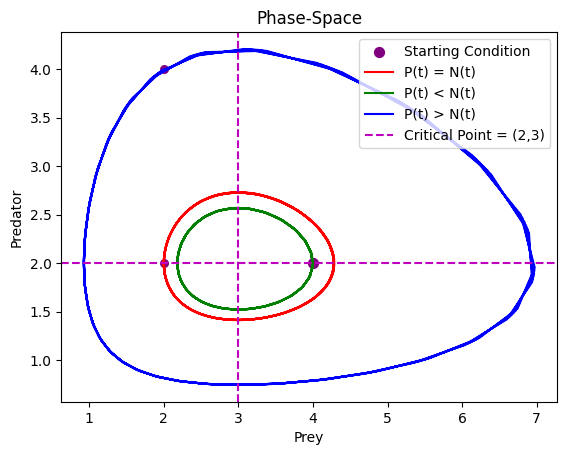

In [ ]:
plt.title('Phase-Space')
plt.xlabel('Prey')
plt.ylabel('Predator')
plt.scatter(4., 2., s = 50, c = 'purple', label = 'Starting Condition')
plt.scatter(2., 4., s = 30, c = 'purple')
plt.scatter(2., 2., s = 30, c = 'purple')
plt.plot(N1, P1, label = 'P(t) = N(t)', c = 'r')
plt.plot(N2, P2, label = 'P(t) < N(t)',  c = 'g')
plt.plot(N3, P3, label = 'P(t) > N(t)',  c = 'b')
plt.axhline(2., linestyle = '--', c = 'm', label = 'Critical Point = (2,3)')
plt.axvline(3, linestyle = '--', c = 'm')

plt.legend()
plt.show()

Phase Spaces are geometric method to analyse differential equations in a qualitative manner, specially with non-linear equations. They are very useful in the study of the stabillity of the system. In the Lotka-Volterra Equations we have the trajectories being circular centered at some critical point $(\dfrac{a}{b},\dfrac{c}{d})$, so the population of the prey and the predators exhibit a ciclical variation.
\
It can be seen that the phase space differs according to the starting condition (N0 and P0), getting larger according to the initial conditions of the prey and the predators, but they all are centered arounf a critical point, which means they are all stable. They also follow the trigonometric direction (anti-clockwise) and the it can be seen in all phase spaces that the once the predators are low enough the prey starts to increase and the cycle happens just like described before.

### **Realistic Predator-Prey Models**


Even though the Lotka-Voleterra Model is quite important for modeling ecological systems it still is quite unrealistic. One of the main assumptions that further this point is the fact that it makes the prey's growth unbounded in the absence of predation. What can be changed to avoid this problem is make its growth rate dependable on the predators densities and make it satisfy a *Logistic Growth* model when **P = 0**.
\
$\dfrac{dN}{dt} = NF(N,P)$
\
$F(N,P) = r(1 - \dfrac{N}{K}) - PR(N)$

A **Logistic growth model** self-limits if the population becomes too large. As it can be seen by the graph below when $t → ∞$  the solutions tend to a finite number, which in this case can be called $K$, defined as the maximum carrying capacity.
\
The predation term also changes, making it saturate for a large N, since it is the response of the predators to change in the prey density. This can be seen in the formulas presented below, (3) and (4).

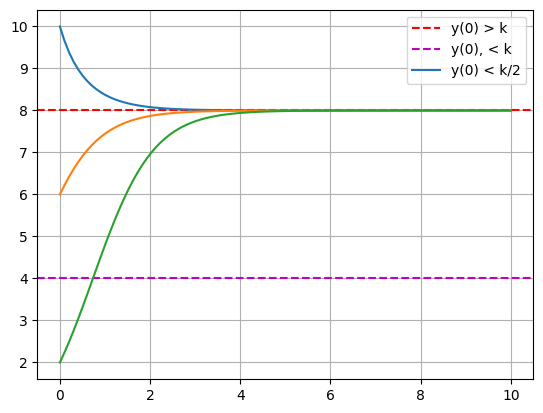

In [ ]:
def logistic_model(u,t, r, k):
  uprime = np.zeros((1))
  uprime[0] = u[0]*(r*(1 - u[0]/k))
  return uprime

r = 1.5
k = 8
time = np.linspace(0., 10., 100)
ans = si.odeint(logistic_model, y0 =[10], t=time, args = (r,k))
ans2 = si.odeint(logistic_model, y0 =[6], t=time, args = (r,k))
ans3 = si.odeint(logistic_model, y0 =[2], t=time, args = (r,k))
plt.axhline(8., linestyle = '--', c = 'r', label = 'k')
plt.axhline(4., linestyle = '--', c = 'm', label = 'k/2')
plt.grid()
plt.plot(time, ans, time, ans2 , time, ans3)

plt.legend(['y(0) > k', 'y(0), < k', 'y(0) < k/2'])

$ \begin{cases}\dfrac{dN}{dt} = N[r(1 - \dfrac{N}{k}) - \dfrac{vP}{N+D}] & (3) \\ \dfrac{dP}{dt} = P[-s + \dfrac{khN}{D + N}] & (4)\end{cases}$

In [ ]:
def real_lv(u, t, r, k, D, s,h, K):
  uprime = np.zeros((len(u)))

  uprime[0] = u[0]*( r*(1 - (u[0]/k) ) - (K*u[1])/(u[0]+ D) )

  uprime[1] = u[1]*(( -s + (K*h*u[0]/ (D+u[0]) ) ))

  return uprime

In [ ]:
### Defining parameters:
r = 1.6
k = 125
K = 3.2
D = 50
s = 0.56
h = 0.6
t = np.linspace(0., 70., 200)
### Initial conditions:
N0 = 20
P0 = 20
u = np.zeros((2))
u[0] = N0
u[1] = P0
### Calling the function:

resp = si.odeint(real_lv, y0 = [N0,P0], t = t, args = (r, k, D, s,h, K))
N = resp.T[0]
P = resp.T[1]


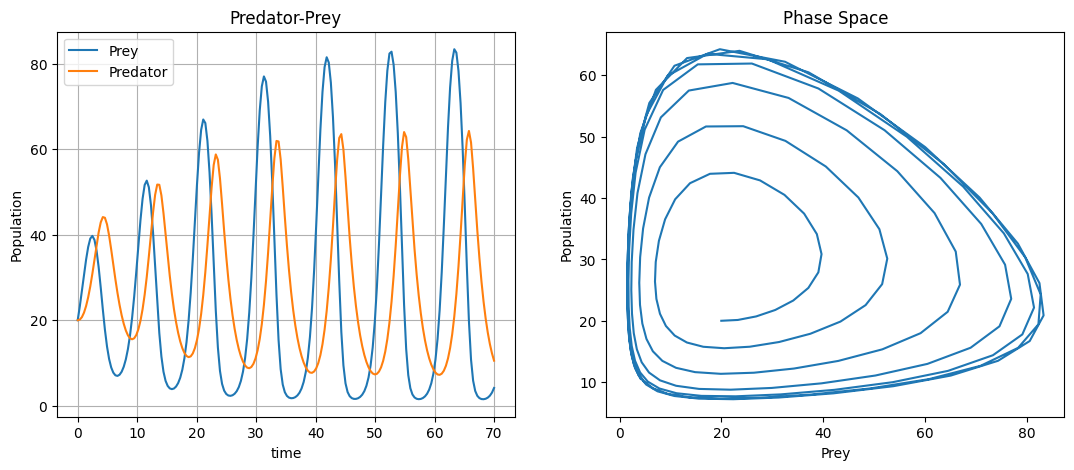

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (13,5))
ax[0].plot(t, N, t, P)
ax[0].set_title('Predator-Prey')
ax[0].legend(['Prey', 'Predator'])
ax[0].set_xlabel('time')
ax[0].set_ylabel('Population')
ax[0].grid()

ax[1].plot(N,P)
ax[1].set_title('Phase Space')
ax[1].set_xlabel('Prey')
ax[1].set_ylabel('Population')

plt.show()

Once again the same logic can be applied when seeing these graphs, where there is a cycle happening, the prey grow, which encourages the predators growth, making the preys population go down, consequently leaving no food for the predators, whose growth rate diminishes, which once again makes way for the preys growth, continuing the cycle.

**References**: \
1. *Murray, J.D., 2002. Mathematical biology: I. An introduction.*
2. *Boyce, W.E., DiPrima, R.C. and Meade, D.B., 2021. Elementary differential equations and boundary value problems. John Wiley & Sons.*
3. *Kingsland, S. (2015). Alfred J. Lotka and the origins of theoretical population ecology. Proceedings of the National Academy of Sciences, 112(31), 9493-9495*

###**Hare and Lynx Interaction**

The course [Introduction to Mathematical Modeling from Whitman College](http://people.whitman.edu/~hundledr/courses/M250F03/M250.html) has this data available in a digitalized form. It does note that this data is from the book "Fundamentals of Ecology" by Odum.

This is one of the most famous examples of applying the Lotka-Volterra Model to real world data. The Hudson Bay Company kept track for year of the fur catch records of the Candian Lynx and the Snowshoe Hare - being the former the predator and the latter the prey - and assuming that these numbers reflect a fixed proportion of the total population of these animals, which might be a questionable assumption, it still has interesting implications. When plotting the data it is noticeable that it shows a periodic oscillation, just as proposed by the models. However it is important to say that the reason for the cycles happening is not so certain and cannot be boiled down to the predator-prey interaction between them.

In [ ]:
import pandas as pd ### library to read data

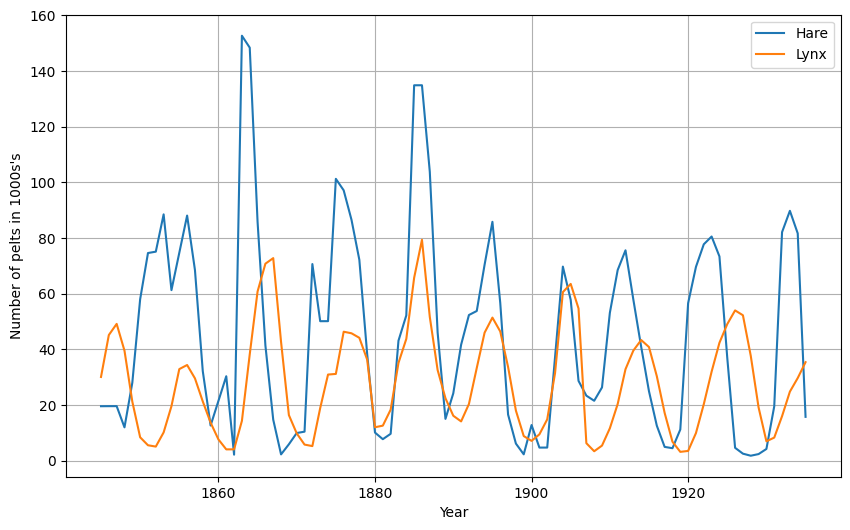

In [ ]:
data = pd.read_csv("/content/LynxHare.txt", delim_whitespace=True, header = None, index_col = 0)

data.index.name = 'Year'
data.columns = ['Hare', 'Lynx']

data.head()
data.plot(figsize = (10,6))
plt.ylabel("Number of pelts in 1000s's")
plt.grid()